# Import Tools

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import File

In [3]:
df = pd.read_csv("./desktop/kickstarter_projects.csv")
df = df.reset_index(drop=True)
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


# Data Cleaning

# Checked to See Formats Within Columns

In [5]:
df.dtypes


ID              int64
Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

# Changed Launched and Deadline to Datetime64 format 

In [6]:
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])
df.dtypes

ID                      int64
Name                   object
Category               object
Subcategory            object
Country                object
Launched       datetime64[ns]
Deadline       datetime64[ns]
Goal                    int64
Pledged                 int64
Backers                 int64
State                  object
dtype: object

# Get Counts to see if the items in columns are misspelled


In [9]:
df['Category'].value_counts()

Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: Category, dtype: int64

In [10]:
df['Subcategory'].value_counts()

Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13339
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: Subcategory, Length: 159, dtype: int64

In [11]:
df['Country'].value_counts()

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64

In [12]:
df['State'].value_counts()

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

# Check for NAN/NULL Values in the DataFrame 

In [13]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State


# Checking for Outliers

In [15]:
df['Goal'].describe()
print(df['Goal'].describe())

count    3.748530e+05
mean     4.586378e+04
std      1.158778e+06
min      0.000000e+00
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.663614e+08
Name: Goal, dtype: float64


In [18]:
count = len(df['Goal'])
mean = np.mean(df['Goal'])
std_dev = np.std(df['Goal'])
min_val = np.min(df['Goal'])
max_val = np.max(df['Goal'])

# print the results
print('Count:', count)
print('Mean:', mean)
print('Standard deviation:', std_dev)
print('Minimum:', min_val)
print('Maximum:', max_val)


Count: 374853
Mean: 45863.78479563989
Standard deviation: 1158776.6330969557
Minimum: 0
Maximum: 166361391


In [20]:
df['Pledged'].describe()
print(df['Pledged'].describe())

count    3.748530e+05
mean     9.121073e+03
std      9.132054e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.250000e+02
75%      4.051000e+03
max      2.033899e+07
Name: Pledged, dtype: float64


In [21]:
df['Backers'].describe()
print(df['Backers'].describe())

count    374853.000000
mean        106.690359
std         911.718520
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: Backers, dtype: float64


# Create New Column Percent of Goal Pledged

In [23]:
df['Percent Goal Pledged'] = df['Pledged'].apply(int) / df['Goal'].apply(int)
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684


In [101]:
df['Percent Goal Pledge Level'] = np.where(df['Percent Goal Pledged'] <= .25, '1 - 25% or less',
                   np.where(df['Goal'] <= .5, '2 - 25.01% to 50%',                 
                   np.where(df['Goal'] <= .75, '3 - 50.01% to 75%',       
                   np.where(df['Goal'] <= .9999, '4 - 75.01% to 99.999%',
                   np.where(df['Goal'] >= 1, '5 - Goal Achieved', 'else')))))
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged,Campaign Length,Campaign Length Cat,Goal Level,Year,Percent Goal Pledge Level
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,39,31 to 60 Days,"1 - $1,000 or Less",2009,5 - Goal Achieved
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,87,61 to 91 Days,"5 - $25,001 or more",2009,1 - 25% or less
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,8,30 Days or Less,"1 - $1,000 or Less",2009,5 - Goal Achieved
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,79,61 to 91 Days,"1 - $1,000 or Less",2009,5 - Goal Achieved
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,28,30 Days or Less,"2 - $1,001 to $5,000",2009,1 - 25% or less


# The Case Count of Percent of Goal Pledge Level Shows Most Failed Campaigns Didn't Get Above 25% of Goal Amount 

In [103]:
df['Percent Goal Pledge Level'].value_counts()

1 - 25% or less      210037
5 - Goal Achieved    164812
2 - 25.01% to 50%         4
Name: Percent Goal Pledge Level, dtype: int64

# Create New Column With Case Statement to Categorize Goal Level

In [86]:
df['Goal Level'] = np.where(df['Goal'] <= 1000, '1 - $1,000 or Less',
                   np.where(df['Goal'] <= 5000, '2 - $1,001 to $5,000',                 
                   np.where(df['Goal'] <= 10000, '3 - $5,001 to $10,000',       
                   np.where(df['Goal'] <= 25000, '4 - $10,001 to $25,000',
                   np.where(df['Goal'] >= 25001, '5 - $25,001 or more', 'else')))))
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged,Campaign Length,Campaign Length Cat,Goal Level
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,39,31 to 60 Days,"1 - $1,000 or Less"
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,87,61 to 91 Days,"5 - $25,001 or more"
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,8,30 Days or Less,"1 - $1,000 or Less"
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,79,61 to 91 Days,"1 - $1,000 or Less"
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,28,30 Days or Less,"2 - $1,001 to $5,000"


In [87]:
df['Goal Level'].value_counts()

2 - $1,001 to $5,000      123061
3 - $5,001 to $10,000      66517
4 - $10,001 to $25,000     63157
5 - $25,001 or more        61228
1 - $1,000 or Less         60890
Name: Goal Level, dtype: int64

# Which Goal Levels Are Most Successful and Which Are Least Successful?

In [88]:
# create the cross tabulation with row-wise normalization
ct = pd.crosstab(df['Goal Level'], df['State'], normalize='index')

# format the values as percentages with two decimal places
ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the formatted cross tabulation
print(ct_sorted)

State                   Canceled    Failed      Live  Successful  Suspended
Goal Level                                                                 
1 - $1,000 or Less      0.073132  0.421038  0.007210    0.490195   0.008425
2 - $1,001 to $5,000    0.077238  0.487262  0.006753    0.425220   0.003527
3 - $5,001 to $10,000   0.098215  0.538524  0.008028    0.350948   0.004285
4 - $10,001 to $25,000  0.120509  0.573681  0.007648    0.294251   0.003911
5 - $25,001 or more     0.173924  0.652610  0.008346    0.159192   0.005929


# Parse Year from Launched Column and Create New Column Named 'Year'

In [89]:
df['Year'] = df['Launched'].dt.year
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged,Campaign Length,Campaign Length Cat,Goal Level,Year
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,39,31 to 60 Days,"1 - $1,000 or Less",2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,87,61 to 91 Days,"5 - $25,001 or more",2009
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,8,30 Days or Less,"1 - $1,000 or Less",2009
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,79,61 to 91 Days,"1 - $1,000 or Less",2009
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,28,30 Days or Less,"2 - $1,001 to $5,000",2009


In [90]:
df['Year'].value_counts()

2015    74919
2014    66993
2016    56536
2017    52200
2013    44836
2012    41161
2011    26236
2010    10519
2009     1329
2018      124
Name: Year, dtype: int64

# Cross Tab of Campaigns By Year in Aggregate and Percentage

In [120]:
# create the cross tabulation
ct = pd.crosstab(df['Year'], df['State'])

# display the cross tabulation
print(ct)

State  Canceled  Failed  Live  Successful  Suspended
Year                                                
2009        150     600     0         579          0
2010        926    4984     0        4593         16
2011       2144   11877     0       12171         44
2012       2631   20586     0       17892         52
2013       3690   21686     0       19402         58
2014       7418   38199     0       21106        270
2015       8926   44301     0       20971        721
2016       7098   30421     1       18675        341
2017       5766   24957  2675       18462        340
2018          2       0   122           0          0


In [121]:
# create the cross tabulation with row-wise normalization
ct = pd.crosstab(df['Year'], df['State'], normalize='index')

# display the formatted cross tabulation
print(ct)

State  Canceled    Failed      Live  Successful  Suspended
Year                                                      
2009   0.112867  0.451467  0.000000    0.435666   0.000000
2010   0.088031  0.473809  0.000000    0.436638   0.001521
2011   0.081720  0.452699  0.000000    0.463905   0.001677
2012   0.063920  0.500134  0.000000    0.434683   0.001263
2013   0.082300  0.483674  0.000000    0.432733   0.001294
2014   0.110728  0.570194  0.000000    0.315048   0.004030
2015   0.119142  0.591319  0.000000    0.279916   0.009624
2016   0.125548  0.538082  0.000018    0.330321   0.006032
2017   0.110460  0.478103  0.051245    0.353678   0.006513
2018   0.016129  0.000000  0.983871    0.000000   0.000000


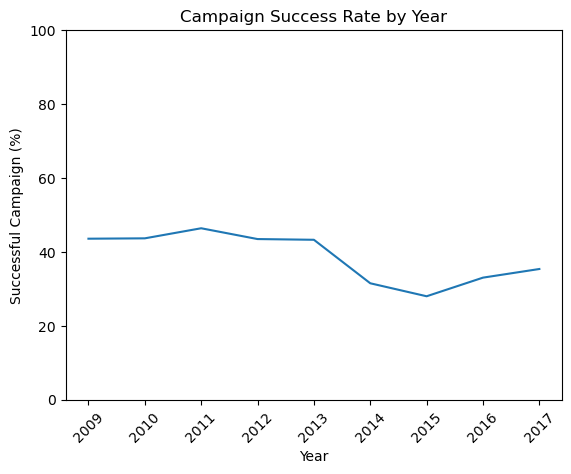

In [123]:
# filter rows for years 2009 to 2017
ct_filtered = ct.loc['2009':'2017']

# create a line chart
plt.plot(ct_filtered.index, ct_filtered['Successful']*100)

# format the chart
plt.title('Campaign Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Successful Campaign (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# display the chart
plt.show()

# Create New Column Campaign Length

In [42]:
df['Campaign Length'] = (df['Deadline'] - df['Launched']).dt.days
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged,Campaign Length
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,28


# Average Campaign Length

In [43]:
count = len(df['Campaign Length'])
mean = np.mean(df['Campaign Length'])
std_dev = np.std(df['Campaign Length'])
min_val = np.min(df['Campaign Length'])
max_val = np.max(df['Campaign Length'])

# print the results
print('Count:', count)
print('Mean:', mean)
print('Standard deviation:', std_dev)
print('Minimum:', min_val)
print('Maximum:', max_val)

Count: 374853
Mean: 33.21719180585456
Standard deviation: 12.804778149172208
Minimum: 0
Maximum: 91


# Create a New Column With Case Statement To Categorize Campaign Lengths

In [77]:
df['Campaign Length Cat'] = np.where(df['Campaign Length'] <= 30, '30 Days or Less',
                                     np.where(df['Campaign Length'] <= 60, '31 to 60 Days', '61 to 91 Days'))
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Percent Goal Pledged,Campaign Length,Campaign Length Cat
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,39,31 to 60 Days
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,87,61 to 91 Days
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,8,30 Days or Less
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,79,61 to 91 Days
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,28,30 Days or Less


# Breakdown of Campaign Lengths By Percentage

In [50]:
count=df['Campaign Length Cat'].value_counts()

# calculate the percentage of each category
percent = count / len(df) * 100

# create a new dataframe with the category, count, and percentage
camp_len_df = pd.DataFrame({'Campaign Length Cat': count.index, 'Count': count.values, 'Percentage': percent.values})

# print the new dataframe
print(camp_len_df)

  Campaign Length Cat   Count  Percentage
0     30 Days or Less  249276   66.499668
1       31 to 60 Days  120869   32.244373
2       61 to 91 Days    4708    1.255959


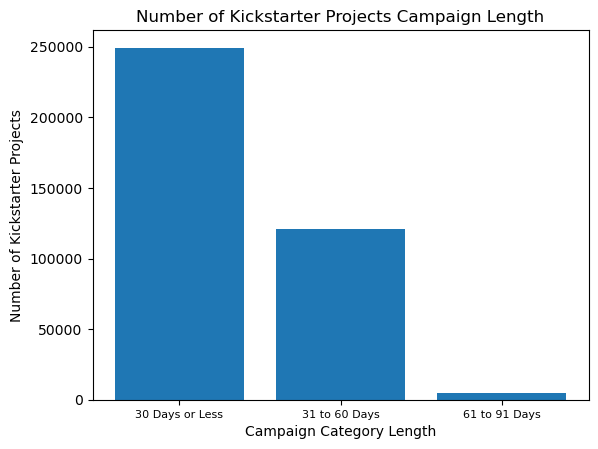

In [52]:
# get the count of values in each category and order in descending value
count = df.groupby('Campaign Length Cat').size()
count = count.sort_values(ascending=False)
keys = count.index

# plot the bar chart
plt.bar(keys, count)
plt.xticks(keys, rotation='horizontal', size=8)
plt.ylabel('Number of Kickstarter Projects')
plt.xlabel('Campaign Category Length')
plt.title('Number of Kickstarter Projects Campaign Length')
plt.show()

# How Many Projects Per Category?

In [25]:
count = df['Category'].value_counts()
print('Count of values in Category column:\n', count)

Count of values in Category column:
 Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: Category, dtype: int64


In [37]:
# get the count of values in each category
count = df['Category'].value_counts()

# calculate the percentage of each category
percent = count / len(df) * 100

# create a new dataframe with the category, count, and percentage
cat_df = pd.DataFrame({'Category': count.index, 'Count': count.values, 'Percentage': percent.values})

# print the new dataframe
print(cat_df)

        Category  Count  Percentage
0   Film & Video  62694   16.724956
1          Music  49529   13.212913
2     Publishing  39378   10.504918
3          Games  35225    9.397017
4     Technology  32562    8.686605
5         Design  30065    8.020477
6            Art  28151    7.509877
7           Food  24599    6.562306
8        Fashion  22812    6.085586
9        Theater  10911    2.910741
10        Comics  10819    2.886198
11   Photography  10778    2.875260
12        Crafts   8809    2.349988
13    Journalism   4754    1.268230
14         Dance   3767    1.004927


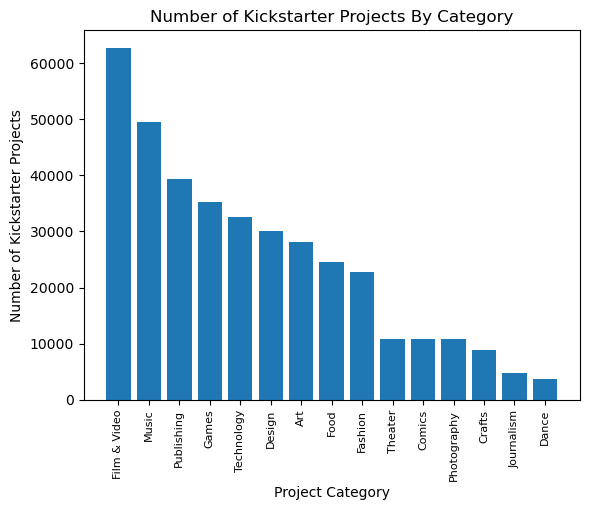

In [29]:
# get the count of values in each category and order in descending value
count = df.groupby('Category').size()
count = count.sort_values(ascending=False)
keys = count.index

# plot the bar chart
plt.bar(keys, count)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Number of Kickstarter Projects')
plt.xlabel('Project Category')
plt.title('Number of Kickstarter Projects By Category')
plt.show()

# Breakdown of Campaigns By Country

In [30]:
count = df['Country'].value_counts()a
print('Count of values in Country column:\n', count)

Count of values in Country column:
 United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64


In [38]:
# get the count of values in each country
count = df['Country'].value_counts()

# calculate the percentage of each country
percent = count / len(df) * 100

# create a new dataframe with the country, count, and percentage
country_df = pd.DataFrame({'Country': count.index, 'Count': count.values, 'Percentage': percent.values})

# print the new dataframe
print(country_df)

           Country   Count  Percentage
0    United States  292618   78.062067
1   United Kingdom   33671    8.982454
2           Canada   14756    3.936476
3        Australia    7839    2.091220
4          Germany    4171    1.112703
5           France    2939    0.784041
6            Italy    2878    0.767768
7     Netherlands     2868    0.765100
8            Spain    2276    0.607171
9           Sweden    1757    0.468717
10          Mexico    1752    0.467383
11     New Zealand    1447    0.386018
12         Denmark    1113    0.296916
13         Ireland     811    0.216351
14     Switzerland     760    0.202746
15          Norway     708    0.188874
16       Hong Kong     618    0.164865
17         Belgium     617    0.164598
18         Austria     597    0.159262
19       Singapore     555    0.148058
20      Luxembourg      62    0.016540
21           Japan      40    0.010671


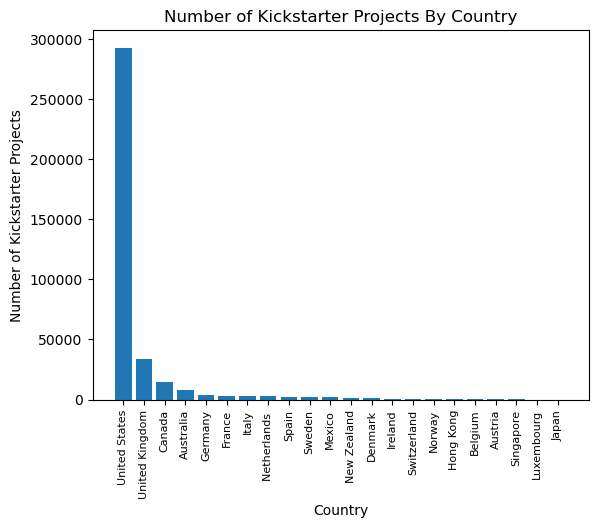

In [124]:
# get the count of values in each category and order in descending value
count = df.groupby('Country').size()
count = count.sort_values(ascending=False)
keys = count.index

# plot the bar chart
plt.bar(keys, count)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Number of Kickstarter Projects')
plt.xlabel('Country')
plt.title('Number of Kickstarter Projects By Country')
plt.show()

In [105]:
# create the cross tabulation with row-wise normalization
ct = pd.crosstab(df['Country'], df['State'], normalize='index')

# format the values as percentages with two decimal places
ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the formatted cross tabulation
print(ct_sorted)

State           Canceled    Failed      Live  Successful  Suspended
Country                                                            
United States   0.096730  0.519650  0.005946    0.373521   0.004152
United Kingdom  0.111698  0.516349  0.008286    0.358380   0.005286
Hong Kong       0.140777  0.422330  0.056634    0.349515   0.030744
Denmark         0.141060  0.508535  0.014376    0.323450   0.012579
Singapore       0.120721  0.497297  0.050450    0.320721   0.010811
New Zealand     0.104354  0.570836  0.007602    0.309606   0.007602
France          0.120109  0.548486  0.017693    0.308949   0.004764
Luxembourg      0.064516  0.612903  0.016129    0.306452   0.000000
Sweden          0.118953  0.569152  0.011383    0.289698   0.010814
Canada          0.144890  0.558146  0.008946    0.280157   0.007861
Australia       0.135859  0.587575  0.008930    0.256410   0.011226
Ireland         0.135635  0.586930  0.013564    0.255240   0.008631
Belgium         0.119935  0.601297  0.019449    

# What Percentage of Projects Reached Their Goal? 

In [53]:
count=df['State'].value_counts()

# calculate the percentage of each category
percent = count / len(df) * 100

# create a new dataframe with the category, count, and percentage
state_df = pd.DataFrame({'State': count.index, 'Count': count.values, 'Percentage': percent.values})

# print the new dataframe
print(state_df)

        State   Count  Percentage
0      Failed  197611   52.716932
1  Successful  133851   35.707597
2    Canceled   38751   10.337652
3        Live    2798    0.746426
4   Suspended    1842    0.491393


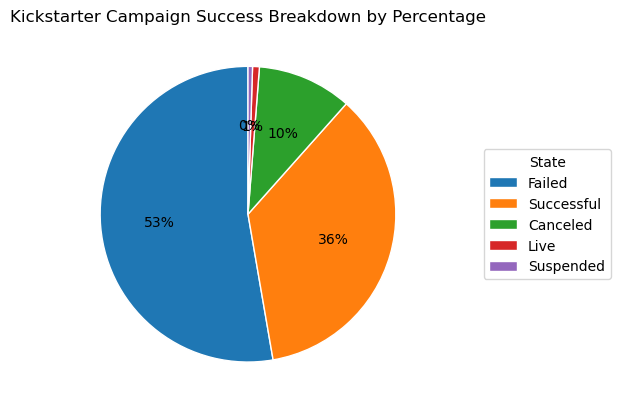

In [66]:
# create a pie chart of state percentages
wedges, labels, pct_texts = plt.pie(state_df['Percentage'], autopct='%1.0f%%', startangle=90,
                                    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

# create a legend for the pie chart
plt.legend(wedges, state_df['State'], title='State', loc='center right', bbox_to_anchor=(1.5, 0.5))

# set the title of the pie chart
plt.title('Kickstarter Campaign Success Breakdown by Percentage')

# display the chart
plt.show()

# CrossTab of Campaign State By Campaign Length

In [67]:
# create the cross tabulation
ct = pd.crosstab(df['Campaign Length Cat'], df['State'])

# display the cross tabulation
print(ct)

State                Canceled  Failed  Live  Successful  Suspended
Campaign Length Cat                                               
30 Days or Less         23802  130157  1326       92834       1157
31 to 60 Days           14385   64903  1472       39432        677
61 to 91 Days             564    2551     0        1585          8


In [68]:
# create the cross tabulation with row-wise normalization
ct_normalized = pd.crosstab(df['Campaign Length Cat'], df['State'], normalize='index')

# display the cross tabulation
print(ct_normalized)

State                Canceled    Failed      Live  Successful  Suspended
Campaign Length Cat                                                     
30 Days or Less      0.095485  0.522140  0.005319    0.372415   0.004641
31 to 60 Days        0.119013  0.536970  0.012178    0.326237   0.005601
61 to 91 Days        0.119796  0.541844  0.000000    0.336661   0.001699


# Which Categories Are Most Successful and Which Are Least Successful?

In [72]:
# create the cross tabulation with row-wise normalization
ct = pd.crosstab(df['Category'], df['State'], normalize='index')

# format the values as percentages with two decimal places
ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the formatted cross tabulation
print(ct_sorted)

State         Canceled    Failed      Live  Successful  Suspended
Category                                                         
Dance         0.043271  0.327847  0.004778    0.620653   0.003451
Theater       0.055632  0.339841  0.003758    0.598845   0.001925
Comics        0.077826  0.373047  0.007025    0.539976   0.002126
Music         0.066607  0.438046  0.005673    0.486685   0.002988
Art           0.078896  0.501936  0.006891    0.408866   0.003410
Film & Video  0.091588  0.524628  0.005296    0.376623   0.001866
Games         0.175983  0.454280  0.008148    0.355373   0.006217
Design        0.138068  0.492732  0.010145    0.350873   0.008182
Publishing    0.091447  0.586952  0.007593    0.312357   0.001651
Photography   0.091483  0.592318  0.004454    0.306643   0.005103
Food          0.089800  0.649173  0.007439    0.247368   0.006220
Fashion       0.116167  0.621647  0.010959    0.245178   0.006049
Crafts        0.095698  0.647406  0.008628    0.240095   0.008173
Journalism

# Deeper Dive Into The Music Category

# Music Genre Success Rate

In [129]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance'
df_cat = df[df['Category'] == 'Music']

# create the cross tabulation with row-wise normalization
ct_normalized = pd.crosstab(df_cat['Subcategory'], df_cat['State'], normalize='index')

ct_sorted = ct_normalized.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State             Canceled    Failed      Live  Successful  Suspended
Subcategory                                                          
Chiptune          0.057143  0.171429  0.000000    0.771429   0.000000
Indie Rock        0.054799  0.302457  0.002652    0.639562   0.000530
Country & Folk    0.048304  0.314761  0.004269    0.631768   0.000899
Classical Music   0.060084  0.303483  0.004210    0.630310   0.001914
Jazz              0.045946  0.347568  0.007027    0.596757   0.002703
Rock              0.069695  0.406333  0.004587    0.517905   0.001480
Music             0.054127  0.460679  0.005997    0.475298   0.003898
Pop               0.081493  0.444776  0.005970    0.465970   0.001791
Punk              0.135647  0.384858  0.012618    0.460568   0.006309
Kids              0.080702  0.463158  0.010526    0.442105   0.003509
World Music       0.068030  0.484301  0.006185    0.438630   0.002854
Blues             0.115672  0.436567  0.007463    0.436567   0.003731
Faith             0.

In [131]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance'
df_cat = df[df['Category'] == 'Music']

# create the cross tabulation
ct = pd.crosstab(df_cat['Subcategory'], df_cat['State'])

ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State             Canceled  Failed  Live  Successful  Suspended
Subcategory                                                    
Music                  722    6145    80        6340         52
Indie Rock             310    1711    15        3618          3
Rock                   471    2746    31        3500         10
Country & Folk         215    1401    19        2812          4
Classical Music        157     793    11        1647          5
Pop                    273    1490    20        1561          6
Jazz                    85     643    13        1104          5
World Music            143    1018    13         922          6
Electronic Music       245    1203    14         700          8
Hip-Hop                394    2857    31         602         27
Faith                   69     551    11         456          5
Metal                   58     369     6         275          9
Punk                    43     122     4         146          2
Kids                    23     132     3

# Music Success Rate By Goal Amount

In [138]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance'
df_cat = df[df['Category'] == 'Music']

# create the cross tabulation with row-wise normalization
ct_normalized = pd.crosstab(df_cat['Goal Level'], df_cat['State'], normalize='index')

ct_sorted = ct_normalized.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State                   Canceled    Failed      Live  Successful  Suspended
Goal Level                                                                 
1 - $1,000 or Less      0.064682  0.385519  0.004588    0.538384   0.006826
2 - $1,001 to $5,000    0.050503  0.409402  0.005560    0.532604   0.001930
3 - $5,001 to $10,000   0.067666  0.438788  0.006871    0.484489   0.002186
4 - $10,001 to $25,000  0.088514  0.504418  0.004102    0.401388   0.001578
5 - $25,001 or more     0.142313  0.668283  0.009349    0.175208   0.004848


In [142]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance'
df_cat = df[df['Category'] == 'Technology']

# create the cross tabulation
ct = pd.crosstab(df_cat['Goal Level'], df_cat['State'])

ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State                   Canceled  Failed  Live  Successful  Suspended
Goal Level                                                           
5 - $25,001 or more         2453    8716   152        1914        142
2 - $1,001 to $5,000         597    3373    55        1403         80
4 - $10,001 to $25,000       912    4427    85        1270         85
3 - $5,001 to $10,000        562    3003    67         957         63
1 - $1,000 or Less           191    1094    18         889         54


# Music Success Rate By Genre and Campaigns Goals of 25K or Higher

In [139]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance' and goal level
df_cat = df[(df['Category'] == 'Music') & (df['Goal Level'] == '5 - $25,001 or more')]

# create the cross tabulation with row-wise normalization
ct_normalized = pd.crosstab(df_cat['Subcategory'], df_cat['State'], normalize='index')

ct_sorted = ct_normalized.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State             Canceled    Failed      Live  Successful  Suspended
Subcategory                                                          
Chiptune          0.000000  0.000000  0.000000    1.000000   0.000000
Indie Rock        0.106796  0.504854  0.009709    0.378641   0.000000
Comedy            0.000000  0.666667  0.000000    0.333333   0.000000
Country & Folk    0.089431  0.634146  0.000000    0.276423   0.000000
Classical Music   0.153846  0.594406  0.013986    0.237762   0.000000
Metal             0.173913  0.565217  0.000000    0.217391   0.043478
Rock              0.191667  0.587500  0.004167    0.212500   0.004167
Jazz              0.076923  0.703297  0.000000    0.197802   0.021978
Music             0.140244  0.649826  0.008711    0.195993   0.005226
Faith             0.163934  0.639344  0.016393    0.163934   0.016393
Kids              0.076923  0.769231  0.000000    0.153846   0.000000
Pop               0.154545  0.677273  0.013636    0.150000   0.004545
Blues             0.

In [140]:
# filter the dataframe to only include rows where Category is 'Fashion' or 'Dance' and goal level
df_cat = df[(df['Category'] == 'Music') & (df['Goal Level'] == '5 - $25,001 or more')]

# create the cross tabulation
ct = pd.crosstab(df_cat['Subcategory'], df_cat['State'])

ct_sorted = ct.sort_values(by='Successful', ascending=False)

# display the cross tabulation
print(ct_sorted)

State             Canceled  Failed  Live  Successful  Suspended
Subcategory                                                    
Music                  161     746    10         225          6
Rock                    46     141     1          51          1
Indie Rock              11      52     1          39          0
Classical Music         22      85     2          34          0
Country & Folk          11      78     0          34          0
Pop                     34     149     3          33          1
World Music             18     138     3          19          0
Electronic Music        26      87     2          19          1
Jazz                     7      64     0          18          2
Faith                   10      39     1          10          1
Hip-Hop                 45     243     2           7          1
Metal                    4      13     0           5          1
Kids                     2      20     0           4          0
Blues                    4      12     1